In [136]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "Resources/mouse_drug_data.csv"
clinical_trial_data_to_load = "Resources/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

merged_data = pd.merge(drug_data, clinical_trial_data, on="Mouse ID", how="inner")
# Display the data table for preview

merged_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [137]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint

grouped_data = merged_data.groupby(["Drug", "Timepoint"])
grouped_data = grouped_data.mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
volume_mean = pd.DataFrame(grouped_data)

# Reset index
volume_mean = volume_mean.reset_index()

# Preview DataFrame
volume_mean

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [138]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_err = merged_data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
std_err = pd.DataFrame(std_err).reset_index()

# Preview DataFrame
std_err


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [139]:
# Minor Data Munging to Re-Format the Data Frames

formatted_data_volume = volume_mean.pivot_table(index = "Timepoint", columns = "Drug")
formatted_err_volume = std_err.pivot_table(index = "Timepoint", columns = "Drug")

# Fix column names so that it is not a tuple after using pivot table
formatted_data_volume.columns = [name[1] for name in formatted_data_volume.columns]
formatted_err_volume.columns = [name[1] for name in formatted_err_volume.columns]

# Preview that Reformatting worked
formatted_data_volume.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [140]:
formatted_err_volume.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


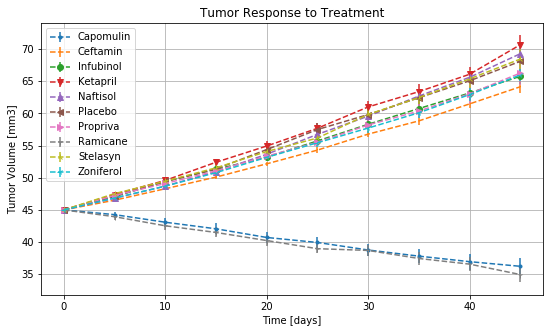

In [141]:
# Generate the Plot (with Error Bars)

#Give a random marker to every plot
marker = itertools.cycle((".",",","o","v","^","<",">","1","2","3","4","8","s","p","P")) 

plt.figure(figsize=(9,5))

for drug in formatted_data_volume.columns:
    plt.errorbar(formatted_data_volume.index, formatted_data_volume[drug], yerr=formatted_err_volume[drug],
                 label = drug, linestyle = "--" , marker = next(marker))
    

# Save the Figure

plt.grid()
plt.legend(loc="upper left")

plt.title("Tumor Response to Treatment")

plt.xlabel("Time [days]")
plt.ylabel("Tumor Volume [mm3]")

plt.savefig("Resources/time_response.png")

## Metastatic Response to Treatment

In [143]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

grouped_data = merged_data.groupby(["Drug", "Timepoint"])
grouped_data = grouped_data.mean()["Metastatic Sites"]

# Convert to DataFrame
met_mean = pd.DataFrame(grouped_data)

# Reset index
met_mean = met_mean.reset_index()

# Preview DataFrame
met_mean

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [144]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

std_err = merged_data.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
std_err = pd.DataFrame(std_err).reset_index()

# Preview DataFrame
std_err


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [145]:
# Minor Data Munging to Re-Format the Data Frames

formatted_data_sites = met_mean.pivot_table(index = "Timepoint", columns = "Drug")
formatted_err_sites = std_err.pivot_table(index = "Timepoint", columns = "Drug")

# Fix column names so that it is not a tuple after using pivot table
formatted_data_sites.columns = [name[1] for name in formatted_data_sites.columns]
formatted_err_sites.columns = [name[1] for name in formatted_err_sites.columns]

# Preview that Reformatting worked
formatted_data.head()


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [146]:
formatted_err_sites.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


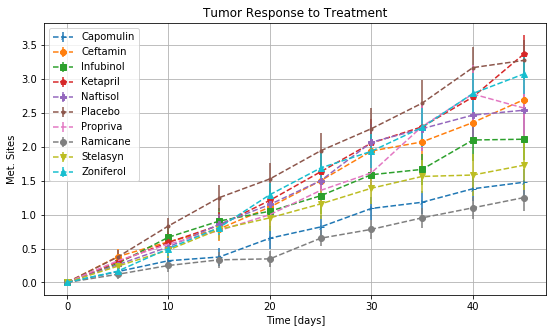

In [151]:
# Generate the Plot (with Error Bars) 

plt.figure(figsize=(9,5))

for drug in formatted_data_sites.columns:
    plt.errorbar(formatted_data_sites.index, formatted_data_sites[drug], yerr=formatted_err_sites[drug],
                 label = drug, linestyle = "--" , marker = next(marker))
    

# Save the Figure

plt.grid()
plt.legend(loc="upper left")

plt.title("Tumor Response to Treatment")

plt.xlabel("Time [days]")
plt.ylabel("Met. Sites")

plt.savefig("Resources/metastasis_response.png")


## Survival Rates

In [148]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

grouped_data = merged_data.groupby(["Drug", "Timepoint"])
grouped_data = grouped_data.count()["Metastatic Sites"]

# Convert to DataFrame
mice_count = pd.DataFrame(grouped_data)

# Change name of column for clarity
mice_count.columns = ["Count"]

# Reset index
mice_count = mice_count.reset_index()

# Preview DataFrame
mice_count


,Drug,Timepoint,Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [149]:
# Minor Data Munging to Re-Format the Data Frames

formatted_data_mice = mice_count.pivot_table(index = "Timepoint", columns = "Drug")

# Fix column names so that it is not a tuple after using pivot table
formatted_data_mice.columns = [name[1] for name in formatted_data_mice.columns]

# Preview that Reformatting worked
formatted_data_mice.head()



,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


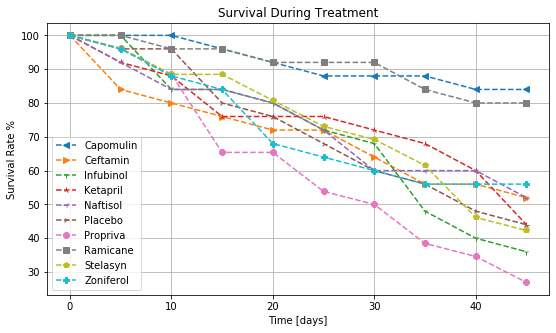

In [152]:
# Generate the Plot (Accounting for percentages)

plt.figure(figsize=(9,5))

for drug in formatted_data_mice.columns:
    plt.errorbar(formatted_data_mice.index, 100*formatted_data_mice[drug]/formatted_data_mice[drug][0],
                 label = drug, linestyle = "--" , marker = next(marker))
    

# Save the Figure

plt.grid()
plt.legend(loc="lower left")

plt.title("Survival During Treatment")

plt.xlabel("Time [days]")
plt.ylabel("Survival Rate %")

plt.savefig("Resources/mice_count.png")

## Summary Bar Graph

In [162]:
# Calculate the percent changes for each drug

vol_change = 100*(formatted_data_volume.iloc[-1,:]-formatted_data_volume.iloc[0,:])/formatted_data_volume.iloc[0,:]

# Display the data to confirm
vol_change

Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

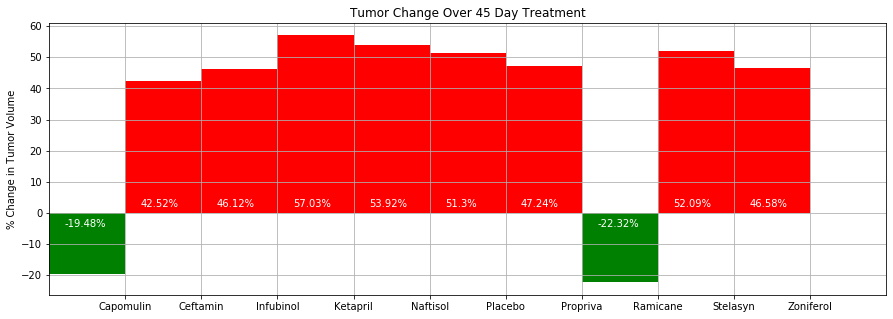

In [200]:
ticks = range(len(vol_change))

plt.figure(figsize=(15,5))
plt.xticks(ticks,vol_change.index)
plt.xlim((-1,len(vol_change)))

for i in range(len(vol_change)):
    x_text = ticks[i]-0.8
    # Splice the data between passing and failing drugs
    if vol_change.values[i] > 0:
        color = "red"
        y_text = 2
    else:
        color = "green"
        y_text = -4.5
    
    # Bars will be aligned to the left of their name, like in the example provided
    plt.bar(vol_change.index[i], vol_change.values[i], color = color, width = -1, align = "edge")
    plt.annotate(f"{round(vol_change.values[i],2)}%",(x_text,y_text), color = "white")




# Save the Figure
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Change in Tumor Volume")
plt.grid()

plt.savefig("Resources/bar_chart.png")

plt.show()

# Trends

In all the plots presented here it is clear that two treatments stand out: Capomulin and Ramicane. They are the only treatments that result in a decrease in Tumor Volume, and the ones with the highest survival rates. It could also be argued that they are the ones where the metastasis is the least common, though with the error bars it is hard to tell if that difference is significative.

Comparing only these two drugs it is hard to decide which one is better. Ramicane has the largest decrease in tumor volume, but Capomulin has a higher survival rate. In terms of the metastatic sites, it would be hard to know if one is better than the other until more analysis is done.